<a href="https://colab.research.google.com/github/kaigitt/GoogleColab/blob/master/%E3%80%90%E7%A0%82%E5%B7%9D%E5%BF%AB%E6%96%97%E3%80%91%E6%95%99%E5%B8%AB%E3%81%AA%E3%81%97%E5%AD%A6%E7%BF%92%E3%81%AE%E5%85%A8%E4%BD%93%E5%83%8F%E3%83%BB%E6%89%8B%E6%B3%95_editor_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 教師なし学習の問題

0.事前準備

1.データ確認（3問）
> データの確認方法について学習します。

2.クラスタリング（10問）

> K-meansについて学習します。

3.次元削減（10問）

> 主成分分析について学習します。





# 0.事前準備

　0.1 学習を開始するにあたり、必要なライブラリを読み込みます。

In [ ]:
# こちらのセルを実行してください。
from pandas import plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

　0.2 クラスタリングで使用するライブラリを追加します。

In [ ]:
# こちらのセルを実行してください。
from sklearn import cluster,preprocessing
from sklearn.cluster import KMeans

　0.3 主成分分析で使用するライブラリを追加します。

In [ ]:
# こちらのセルを実行してください。
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.ticker as ticker

　0.4 データセットで使用するライブラリを読み込みます。

In [ ]:
# こちらのセルを実行してください。
from sklearn.datasets import load_iris

　0.5 クラスタリングと次元削減ではアヤメのデータを使用します。

　　データセットのデータを読込みます。

In [ ]:
# こちらのセルを実行してください。
df_iris=pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
df_iris['target'] = load_iris().target
df_iris['kind'] = df_iris['target'].map({i: load_iris().target_names[i] for i in range(3)})

df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,kind
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


# 1.データ確認（3問）

# (1)クラスタリングと次元削減で使うデータ


　1.1 アヤメの花のデータセットの行数と列数を確認してください。

In [ ]:
df_iris.shape

(150, 6)

In [ ]:
df_iris.head(50)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,kind
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


　1.2 アヤメの花のデータフレームの最初の10行を表示してください。

In [ ]:
df_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,kind
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


　1.3 各列の統計量の一覧をそれぞれ少数点1桁で表示してください。

In [ ]:
df_iris.describe().round()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.0,150.0,150.0,150.0,150.0
mean,6.0,3.0,4.0,1.0,1.0
std,1.0,0.0,2.0,1.0,1.0
min,4.0,2.0,1.0,0.0,0.0
25%,5.0,3.0,2.0,0.0,0.0
50%,6.0,3.0,4.0,1.0,1.0
75%,6.0,3.0,5.0,2.0,2.0
max,8.0,4.0,7.0,2.0,2.0


# 2.クラスタリング（10問）

　アヤメのデータを使用してクラスタリングを行います。アルゴリズムはK-meansを使用します。


　2.1 アヤメのデータの散布図行列を出力してください。

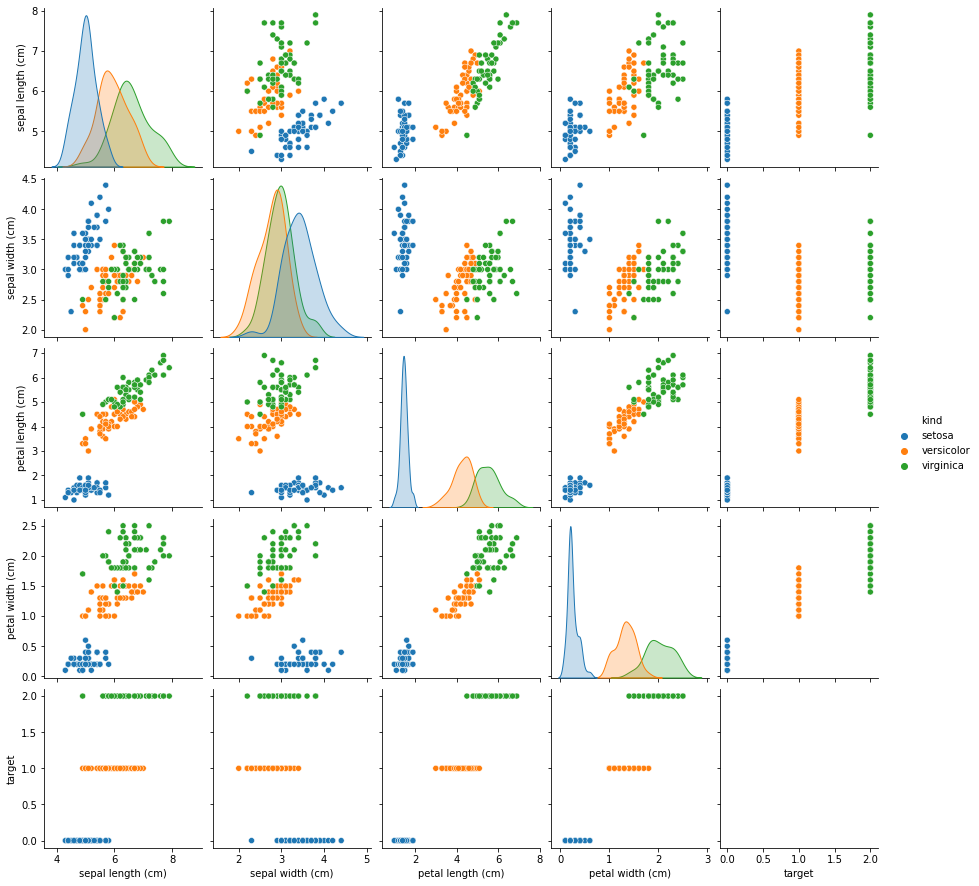

In [ ]:
sns.pairplot(df_iris, hue='kind')

　2.2 花弁の長さ(petal length)と幅(petal width)の散布図を出力してください。

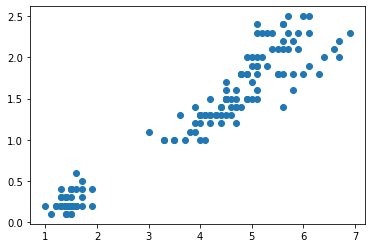

In [ ]:
plt.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'])

　2.3 花弁の長さ(petal length)と幅(petal width)の列を抽出し、新しいデータフレームとして変数に代入して表示してください。

In [ ]:
iris_petal_len_width = df_iris[['petal length (cm)', 'petal width (cm)']].copy()
iris_petal_len_width

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


　2.4 2.3で作成したデータフレームの要素を標準化して上の5行を出力してください。

In [ ]:
sc = preprocessing.StandardScaler()
x_norm = sc.fit_transform(iris_petal_len_width)
x = x_norm[:,0]
y = x_norm[:,1]

pd.DataFrame(x_norm).head()

　2.5 クラスタ数を3にしてK-meansを実行しクラスタリングしてください。

In [ ]:
km = KMeans(n_clusters=3)
km.fit(x_norm)

KMeans(n_clusters=3)

　2.6 重心を表示してください。

In [ ]:
cluster_center = pd.DataFrame(km.cluster_centers_)
display(cluster_center)

,0,1
0,0.305873,0.165418
1,-1.304987,-1.254893
2,1.028000,1.127978


　2.7 散布図に重心を表示してください。

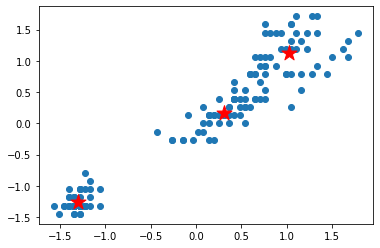

In [ ]:
plt.scatter(x,y)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker="*", c="red")
plt.show

　2.8 クラスタリングした結果の数値を表示してください。

In [ ]:
iris_cluster = km.labels_
print(iris_cluster)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


　2.9 クラスタリングした結果を色分けしてグラフ表示してください。

<function matplotlib.pyplot.show>

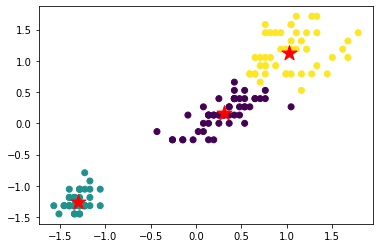

In [ ]:
plt.scatter(x, y, c = km.labels_)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250,marker="*", c="red")
plt.show

　2.10 エルボー法でクラスタリング数を探索してください。random_stateを0に指定してください。

In [ ]:
distortions=[]
for i in range(1, 15):
  km_elbow = KMeans(n_clusters=i, random_state=0)
  km_elbow.fit(x_norm)
  distortions.append(km_elbow.inertia_)
plt.plot(range(1,15), distortions,marker='o')
plt.xticks(range(1,15))
plt.xlabel('Number')
plt.show()

# 3.次元削減（10問）

　アヤメのデータを使用して次元削減を行います。アルゴリズムは主成分分析を使います。

　3.1 データの散布図行列を表示してください。

　3.2 主成分分析を実行してください。

　3.3 主成分分析の結果を格納したデータフレームの上から5行を表示してください。

　3.4 主成分の数を表示してください。

　3.5 各主成分の寄与率を全て合計してください。

　3.6 各主成分と元の変数との相関係数をヒートマップで可視化してください。

　3.7 各主成分の固有値を表示してください。

　3.8 固有値のスクリープロットを表示してください。

>`PCAのインスタンス.explained_variance_`で各主成分の固有値を求めることができます。

　3.9 各主成分の寄与率を表示してください。

　3.10 累積寄与率をグラフで表示してください。